# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# 設定 data_path
dir_data = './data/'

In [4]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()
#app_train['CNT_CHILDREN']

Path of read in data: ./data/application_train.csv


0         0
1         0
2         0
3         0
4         0
5         0
6         1
7         0
8         0
9         0
10        1
11        0
12        0
13        1
14        0
15        0
16        0
17        1
18        0
19        1
20        0
21        1
22        1
23        0
24        2
25        0
26        0
27        1
28        0
29        0
         ..
307481    0
307482    0
307483    0
307484    0
307485    1
307486    1
307487    0
307488    0
307489    0
307490    0
307491    2
307492    0
307493    0
307494    1
307495    0
307496    0
307497    0
307498    0
307499    0
307500    0
307501    3
307502    1
307503    0
307504    0
307505    0
307506    0
307507    0
307508    0
307509    0
307510    0
Name: CNT_CHILDREN, Length: 307511, dtype: int64

## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [34]:
#1
"""
Your code here
"""
cut_rule =  [0, 0.01, 2, 5.01, np.inf]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.001, 0.01]    215371
(0.01, 2.0]        87868
(2.0, 5.01]         4230
(5.01, inf]           42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [35]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
(-0.001, 0.01]    166288.713566
(0.01, 2.0]       174725.712648
(2.0, 5.01]       173626.303191
(5.01, inf]       147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

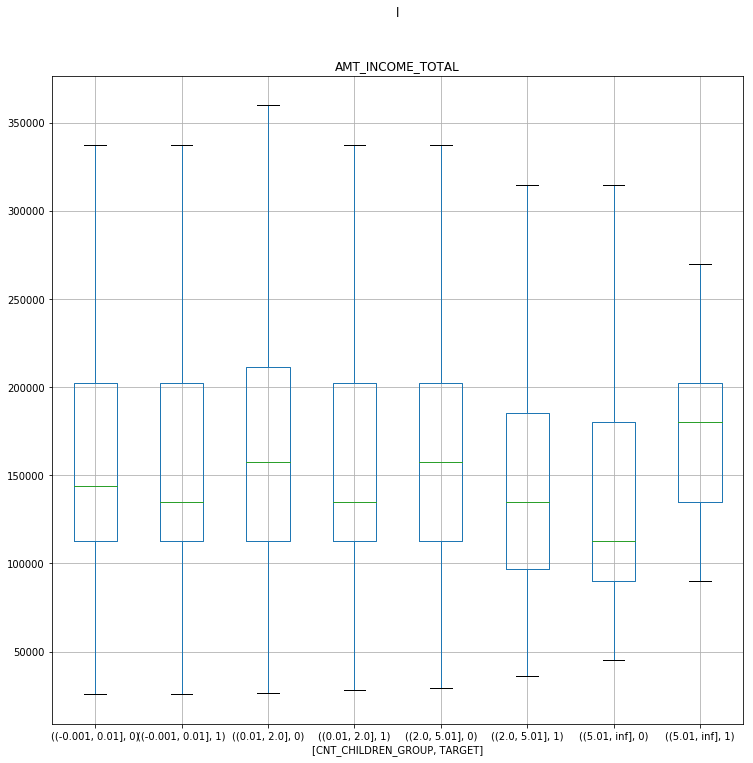

In [37]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('l')
plt.show()

In [39]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:  (x-x.mean())/x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345856
1,270000.0,0.990553
2,67500.0,-0.943538
3,135000.0,-0.298841
4,121500.0,-0.427780
